In [1]:
%matplotlib inline

Instalar
======
- pip install scikit-image
- pip3 install scikit-image (python 3)
- pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
from skimage import data, segmentation, exposure, restoration, measure, filters
import matplotlib.pyplot as plt
import numpy as np

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.segmentation import random_walker
from scipy import ndimage

Creando una imagen
=====================

Cómo crear una imagen con los comandos básicos de NumPy: np.zeros, slicing.

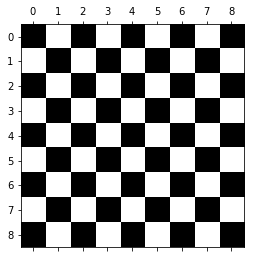

In [3]:
check = np.zeros((9, 9))
## ::2 = cada dos elementos
## 1::2 = cada 2 elementes empezando en el 1
check[::2, 1::2] = 1
check[1::2, ::2] = 1

## matshow: Display an array as a matrix in a new figure window.
plt.matshow(check, cmap='gray')
plt.show()


Cargar y mostar una imagen
=========================


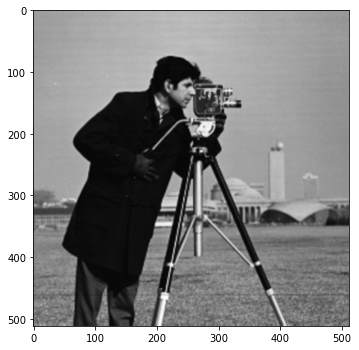

In [26]:
camera = data.camera()

plt.figure(figsize=(5, 5))
## cmap = colormap
## interpolation = obtención de nuevos puntos partiendo del conocimiento de un conjunto discreto de puntos
##                 [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
##                 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
##                 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
plt.imshow(camera, cmap='gray', interpolation='gaussian')
#plt.axis('off')

plt.tight_layout()
plt.show()

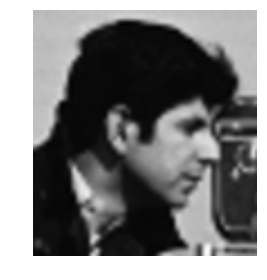

In [39]:
camera = data.camera()
imagen = camera[70:180,180:280]

plt.imshow(imagen, cmap='gray', interpolation='gaussian')
plt.axis('off')

plt.tight_layout()
plt.show()

otsu value:  87


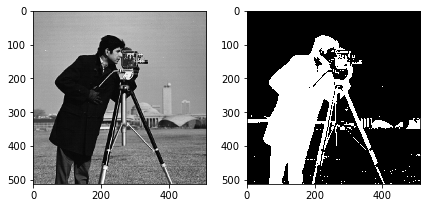

In [62]:
camera = data.camera()
val = filters.threshold_otsu(camera)
print('otsu value: ',val)
#val = 130
hist, bins_center = exposure.histogram(camera)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap='gray', interpolation='nearest')
#plt.axis('off')

plt.subplot(132)
plt.imshow(camera < val, cmap='gray', interpolation='nearest')
plt.tight_layout()
plt.show()

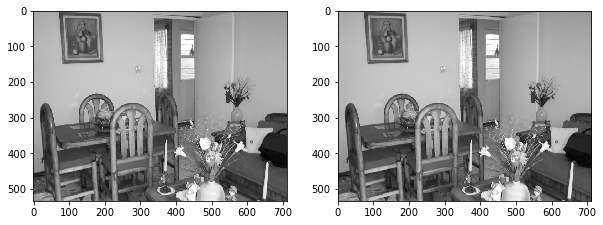

In [13]:
# desde un archivo
ima2 = data.load('C:\\Users\DMC-LAPTOP-14\Sesion2\ImageForSobelOperator.png') # 2 dimensiones
ima3 = data.load('C:\\Users\DMC-LAPTOP-14\Sesion2\ImageForSobelOperator.png') # 3 dimensiones

plt.figure(figsize=(10,10))
#subplot(nrows, ncols, index)
plt.subplot(121)
plt.imshow(ima2)
#plt.imshow(ima2, cmap='gray')

plt.subplot(122)
plt.imshow(ima3)


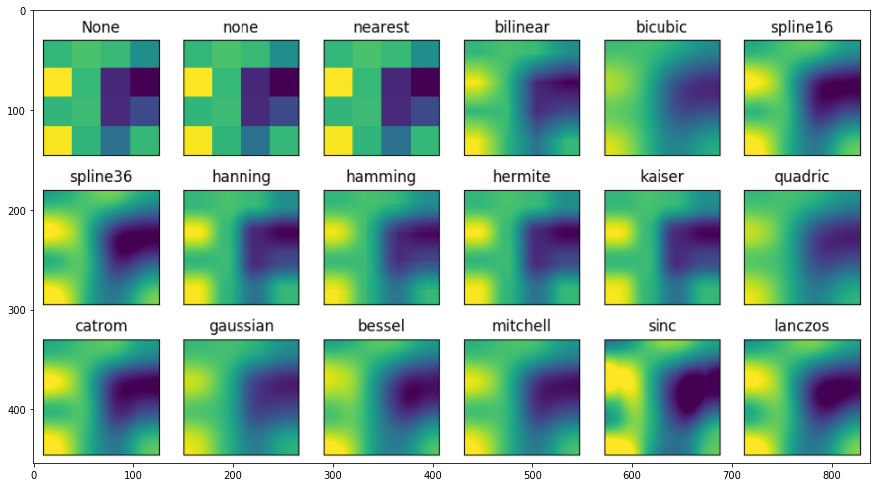

In [83]:
# desde un archivo
inter3 = data.load('D:\\fsanroman\\Courses\\auto_examples_jupyter8\\interpolation.png', as_grey=False) # 3 dimensiones

plt.figure(figsize=(15,15))
plt.imshow(inter3)

Otsu thresholding
============================

El algoritmo busca reducir los niveles de gris de la imagen a binario (bi-modal histogram)



otsu value:  87


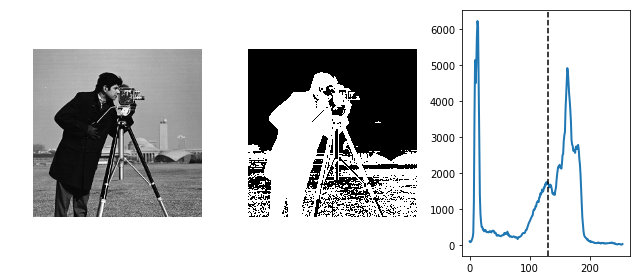

In [92]:
camera = data.camera()
val = filters.threshold_otsu(camera)
print('otsu value: ',val)
#val = 130
hist, bins_center = exposure.histogram(camera)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(camera < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

Segmentación usando Contornos
=====================

Visualizar contornos de una imagen (escala de grises).


107


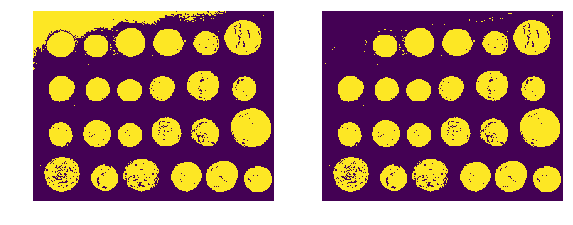

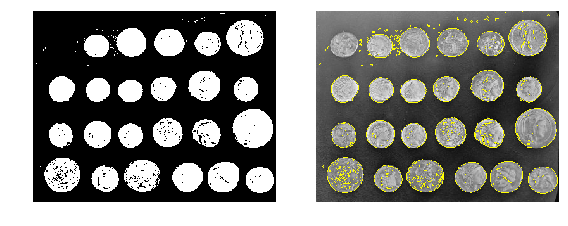

In [108]:
coins = data.coins()
val = filters.threshold_otsu(coins)
print(val)
mask = coins > val
clean_border = segmentation.clear_border(mask).astype(np.int)
coins_edges = segmentation.mark_boundaries(coins, clean_border)

plt.figure(figsize=(9.5, 9.5))
plt.subplot(121)
plt.imshow(mask)
plt.axis('off')
plt.subplot(122)
plt.imshow(clean_border)
plt.axis('off')

plt.figure(figsize=(8, 3.5))
plt.subplot(121)
plt.imshow(clean_border, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(coins_edges)
plt.axis('off')

plt.tight_layout()
plt.show()

Los enteros pueden desbordarse
=====================

Una imagen son de clase uint8 (enteros almacenados en 8 bits) o de clase uint16 (enteros almacenados en 16 bits) y pueden almacenar, respectivamente,  2^8=256  valores en el rango  [0,255] , o  2^16=65536 valores en el rango  [0,65535].

Ejemplo de desbordamiento al trabajar con enteros.

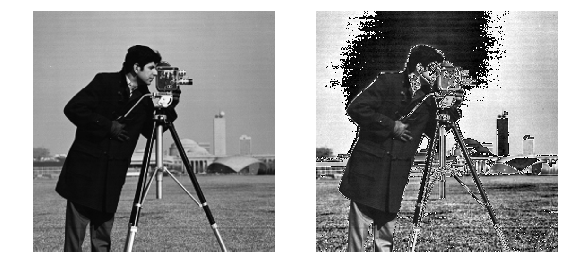

In [112]:
camera = data.camera()
camera_multiply = 3 * camera

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(122)
plt.imshow(camera_multiply, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.tight_layout()
plt.show()

Histograma de una imagen
====================================

La ecualización de histogramas hace que las imágenes tengan un histograma uniforme.

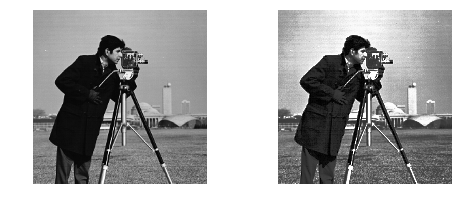

In [9]:
camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)

plt.figure(figsize=(7, 3))

plt.subplot(121)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(122)
plt.imshow(camera_equalized, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()

Filtros de eliminación de ruidos
=================================

Este ejemplo compara varios filtros de eliminación de ruido disponibles en scikit-image: filtro Gaussiano, filtro mediano y una variación total de eliminación de ruido

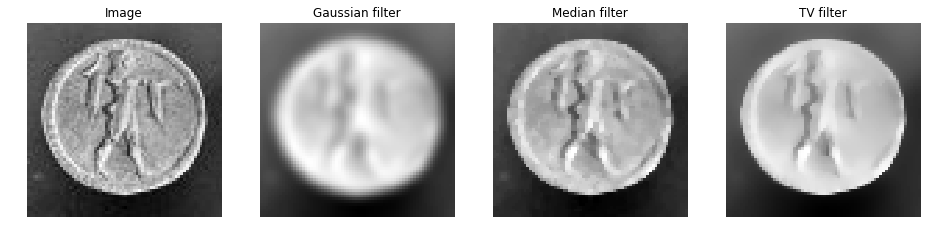

In [10]:
coins = data.coins()
gaussian_filter_coins = filters.gaussian(coins, sigma=2)
med_filter_coins = filters.median(coins, np.ones((3, 3)))
tv_filter_coins = restoration.denoise_tv_chambolle(coins, weight=0.1)

plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Image')
plt.subplot(142)
plt.imshow(gaussian_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Gaussian filter')
plt.subplot(143)
plt.imshow(med_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Median filter')
plt.subplot(144)
plt.imshow(tv_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('TV filter')
plt.show()

Segmentación usando Watershed y random walker
==============================================

Este ejemplo compara dos métodos de segmentación para separar dos discos conectados: el algoritmo watershed y el algoritmo random walker.

Ambos métodos de segmentación requieren semillas, que son píxeles que pertenecen inequívocamente a una region. Aquí, los máximos locales del mapa de distancia al fondo se usan como semillas.

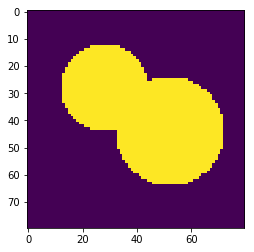

In [119]:
# creamos la imagen: dos circulos sobrepuestos
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
plt.imshow(image)

c:\users\fsanroman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


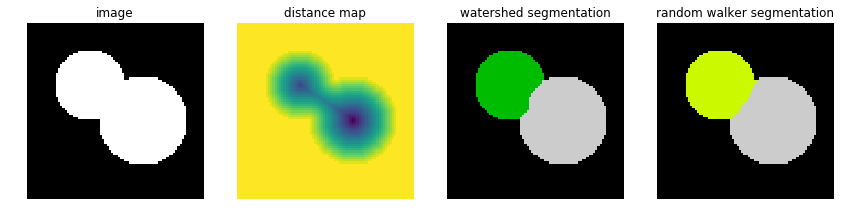

In [123]:
## Generar los marcadores como máximos locales de la distancia al fondo

## calcula la distancia desde puntos distintos de cero (es decir, sin fondo) al punto cero más cercano (es decir, de fondo).
distance = ndimage.distance_transform_edt(image) #distancia euclideana

## Hallamos el valor de la función que es mayor que los valores de la función 
## en puntos cercanos, pero que no es el mayor de todos los valores - (máximo relativo)
local_maxi = peak_local_max(
    distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = measure.label(local_maxi)

labels_ws = watershed(-distance, markers, mask=image) #algoritmo 1

markers[~image] = -1
labels_rw = random_walker(image, markers) #algoritmo 2

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('image')
plt.subplot(142)
plt.imshow(-distance, interpolation='nearest')
plt.axis('off')
plt.title('distance map')
plt.subplot(143)
plt.imshow(labels_ws, cmap='spectral', interpolation='nearest')
plt.axis('off')
plt.title('watershed segmentation')
plt.subplot(144)
plt.imshow(labels_rw, cmap='spectral', interpolation='nearest')
plt.axis('off')
plt.title('random walker segmentation')

plt.tight_layout()
plt.show()

Sobel filter
=================

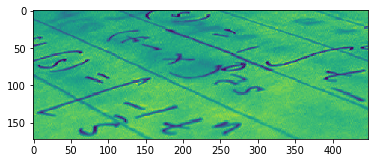

In [48]:
plt.imshow(data.text())
#page
#moon
#horse

c:\users\fsanroman\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


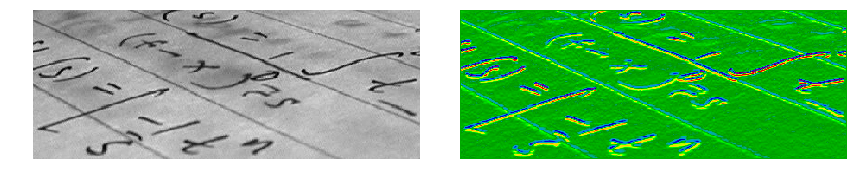

In [63]:
text = data.text()
#text = ima
hsobel_text = filters.sobel_h(text)

plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.imshow(text, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(122)
plt.imshow(hsobel_text, cmap='spectral', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()